# HW6

# DSCI 552

# Chunhao Zhang 5764821257

# 1. Tree-Based Methods

# (a)

In [15]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut, RandomizedSearchCV, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
import matplotlib.image as mpimg
from sklearn import svm

In [16]:
train_data = pd.read_csv('aps_failure_training_set.csv', na_values = 'na', skiprows = 20)
train_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [17]:
test_data = pd.read_csv('aps_failure_test_set.csv', na_values = 'na', skiprows = 20)
test_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


# (b)

# i.

In [28]:
###   https://datascience.foundation/datatalk/methods-for-dealing-with-missing-values-in-datasets#:~:text=Mean%2C%20median%20and%20mode%20are,on%20groups%20are%20usually%20considered.
###   where I got information about techniques dealing with data with missing values.


Imputation Methods:

   Popular Averaging Techniques: mean, median and mode
   
   Conditional mean imputation: select those cases with complete information and regress X on all the other                                         independent variables. Then, use the estimated equation to predict X for those                                     missing cases

Model-Based Methods:

   Maximum Likelihood: use this method to get the variance-covariance matrix for the variables, and then use the                          obtained matrix to estimate value that is most likely to have resulted in the observed data
   
   Multiple imputation: replaces each missing item with two or more acceptable values, representing a distribution                         of possibilities 

# ii.

In [18]:
data = pd.concat([train_data, test_data], axis = 0, ignore_index = True)
data_X = data.iloc[:, 1:]
data_X

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [19]:
data_y = data.iloc[:, 0]
data_y

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
75995    neg
75996    neg
75997    neg
75998    neg
75999    neg
Name: class, Length: 76000, dtype: object

In [20]:
NAN_col = data_X.isnull().any(axis = 0)
for i, item in enumerate(NAN_col):
    if item == True:
        data_X.iloc[:,i] = data_X.iloc[:,i].fillna(data_X.iloc[:,i].mean())
        
data_X

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0.72556,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058,0.72556,0.000000e+00,150629.962105,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040,0.72556,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12,0.00000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874,0.72556,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,81852,0.72556,2.130706e+09,892.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
75996,18,0.00000,5.200000e+01,46.000000,8.0,26.0,0.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
75997,79636,0.72556,1.670000e+03,1518.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
75998,110,0.72556,3.600000e+01,32.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [82]:
CV_report = data_X.std() / data_X.mean()
CV_report = pd.DataFrame(CV_report, columns = ['CV'])
CV_report.reset_index(inplace = True)
CV_report.columns = ['Features', 'CV']
CV_report

,Features,CV
0,aa_000,4.328608
1,ab_000,2.178273
2,ac_000,2.167653
3,ad_000,206.721500
4,ae_000,22.293670
...,...,...
165,ee_007,4.885098
166,ee_008,3.335037
167,ee_009,5.753933
168,ef_000,47.919544


# iii.

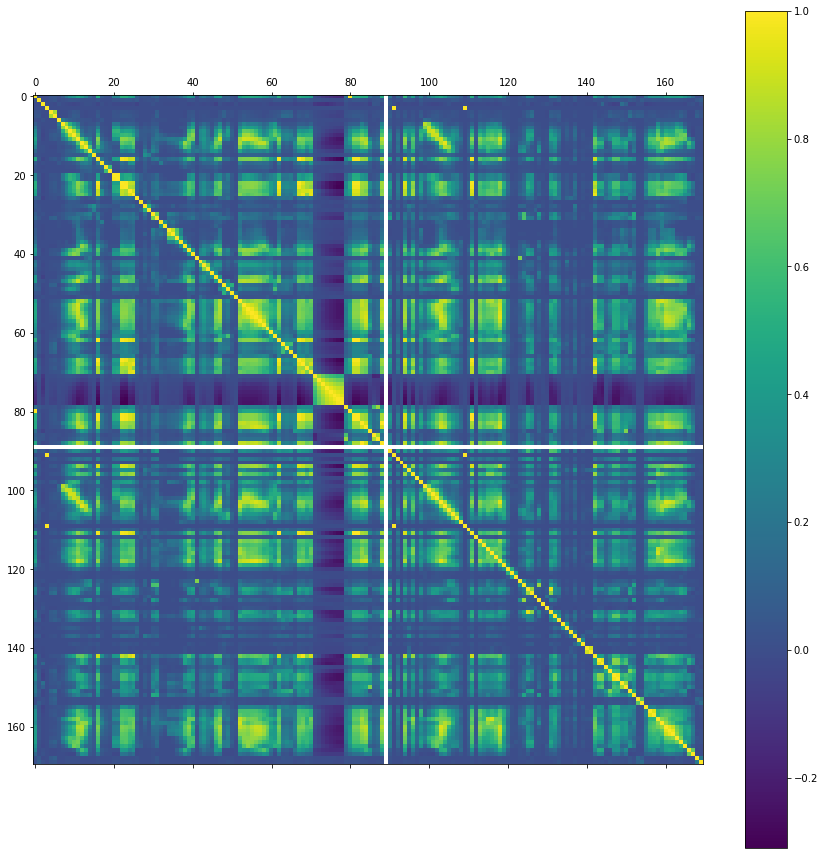

In [83]:
fig = plt.figure(figsize = (15, 15))
plt.matshow(data_X.corr().round(2), fignum = fig.number)
plt.colorbar()
plt.show()

# iv.

In [84]:
CV_report.sort_values(by = 'CV', ascending = False, inplace = True)
CV_highest = CV_report.iloc[:int(math.sqrt(170)), :]
CV_highest

,Features,CV
91,cf_000,207.270274
109,co_000,206.876129
3,ad_000,206.721500
122,cs_009,192.522611
138,dj_000,122.128153
27,as_000,113.882755
136,dh_000,112.652450
134,df_000,111.369666
6,ag_000,91.460654
29,au_000,86.085638


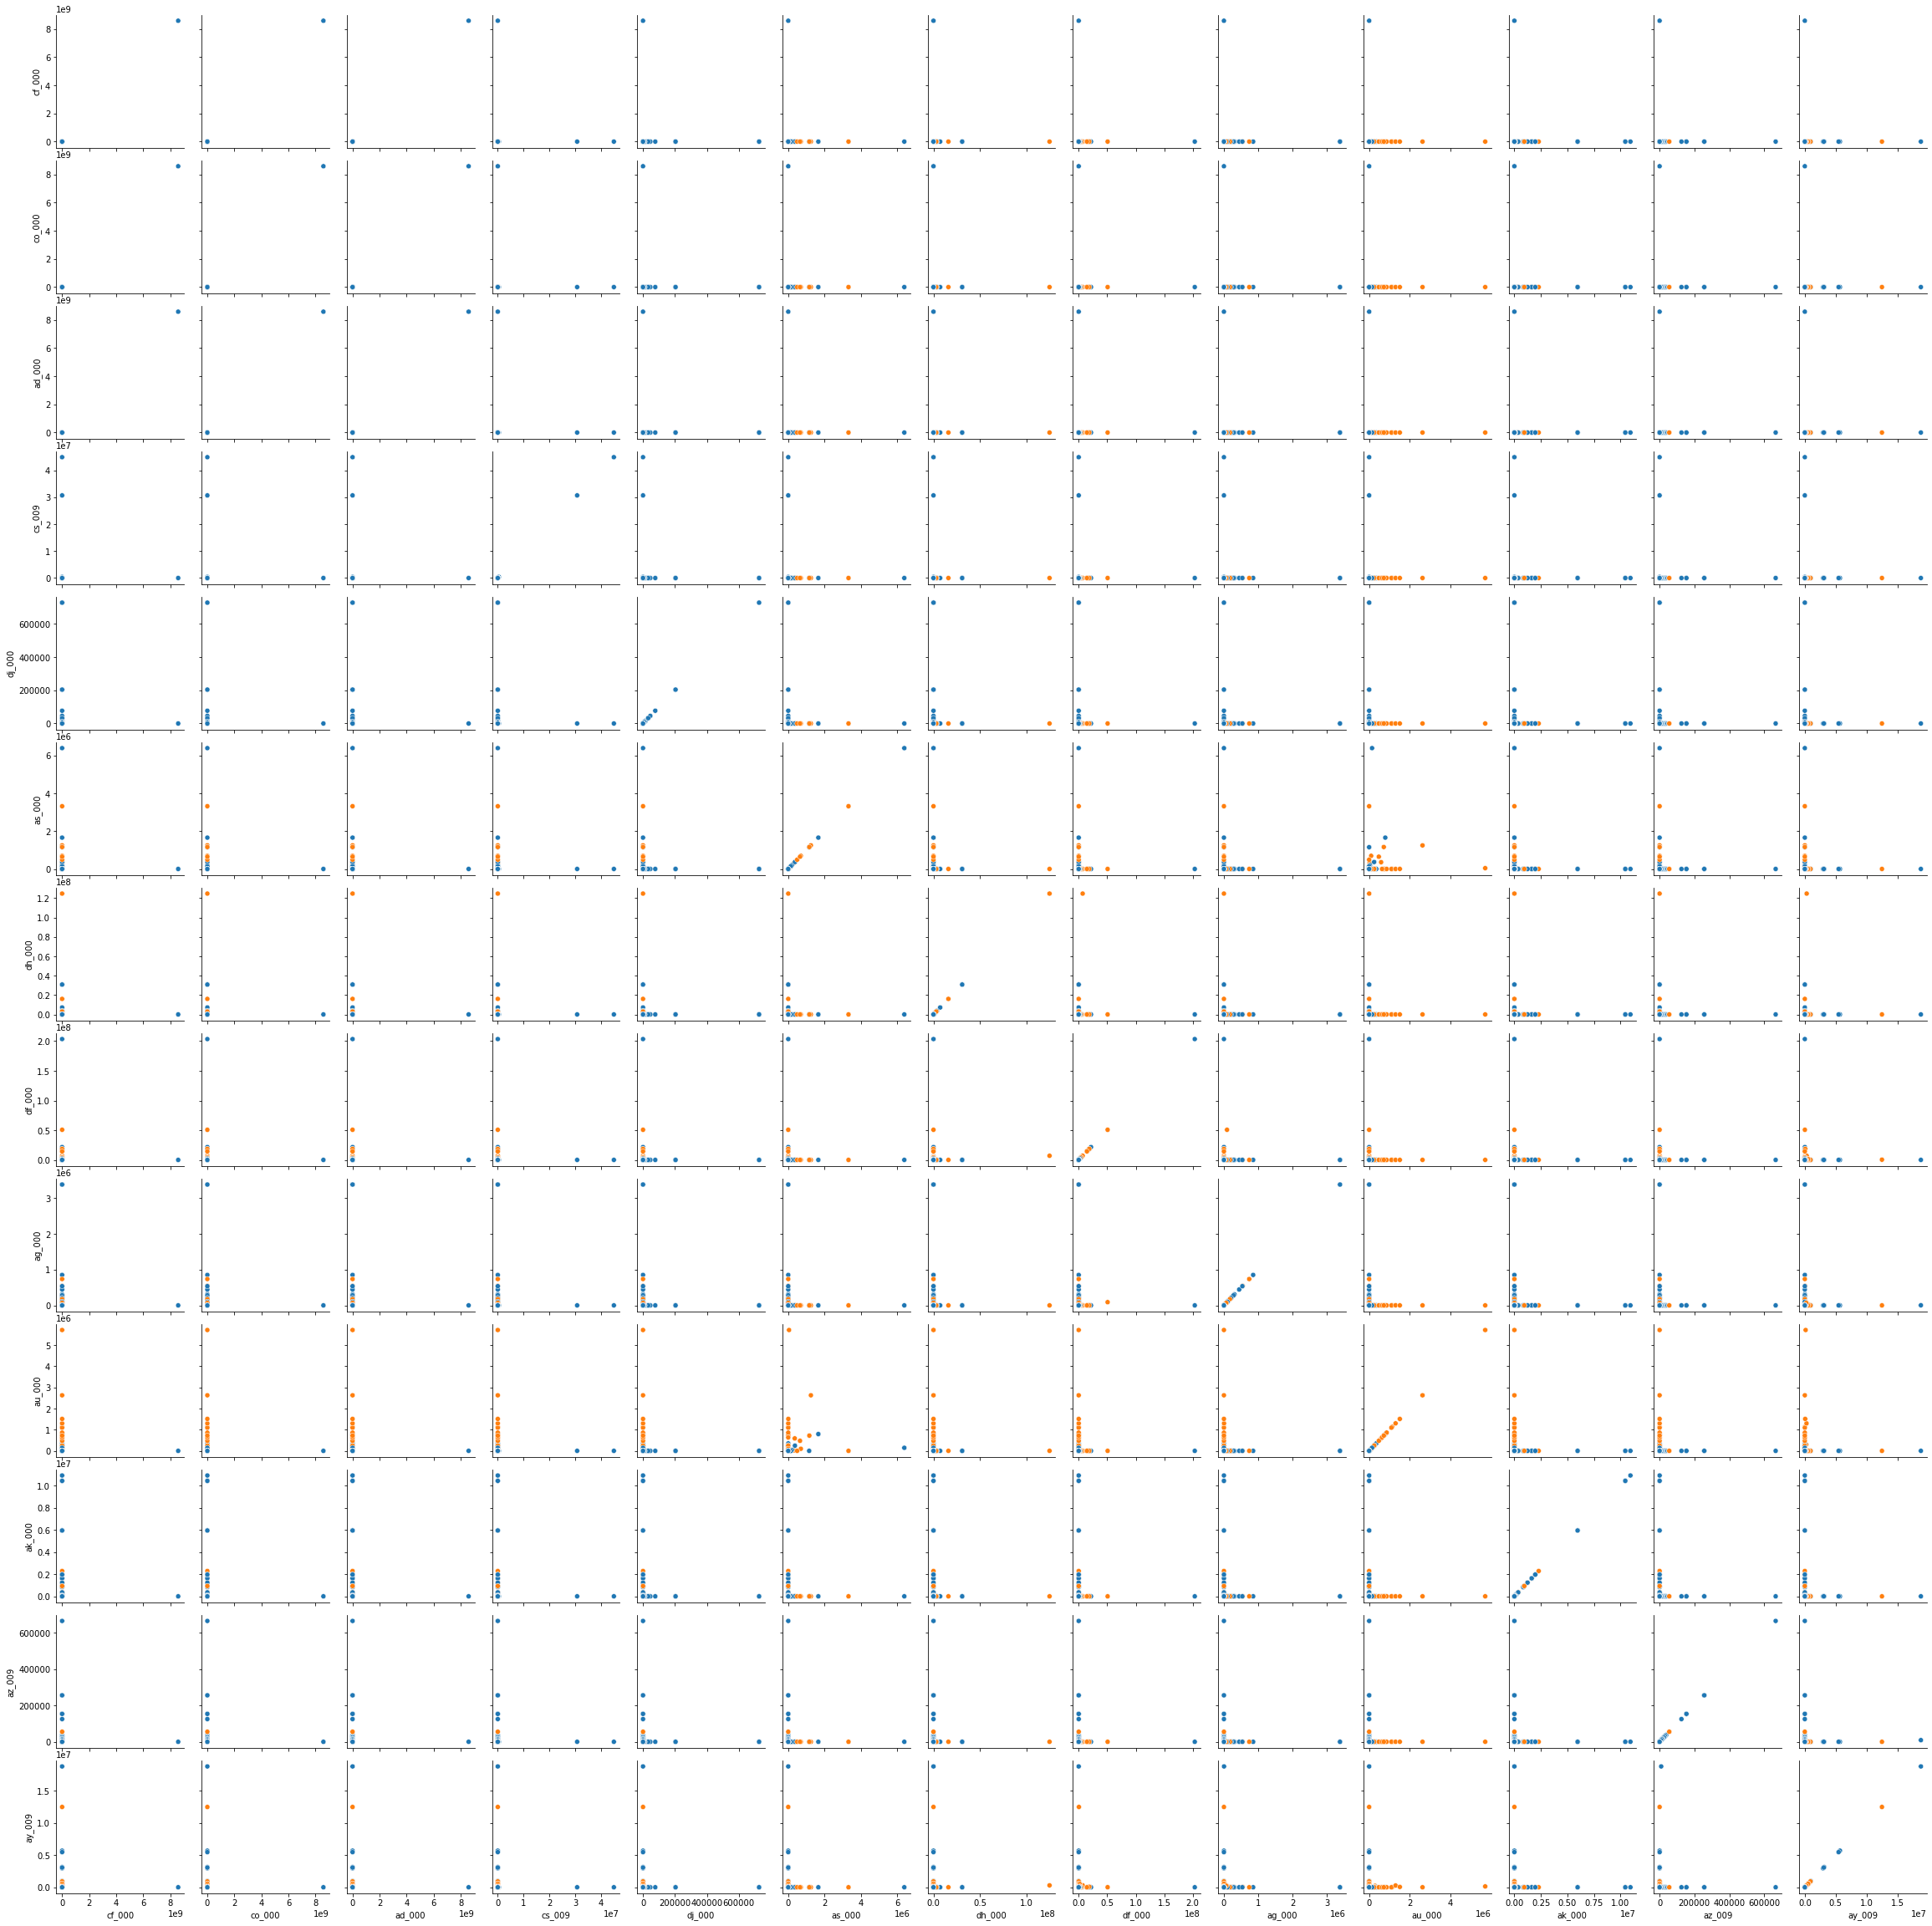

In [95]:
data_paired = CV_highest['Features'].tolist()
data_paired.append('class')

df = data_X.copy()
df['class'] = data_y

g = sns.PairGrid(df[data_paired], hue = 'class')
g.map(sns.scatterplot)

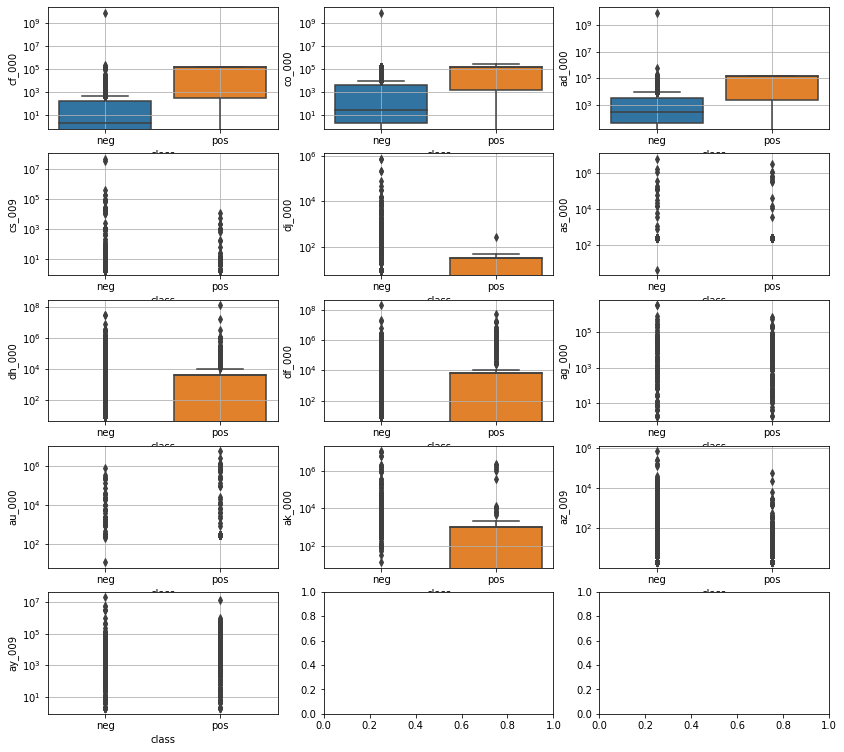

In [31]:
fig, ax = plt.subplots(figsize = (14, 13), nrows = 5, ncols = 3)

item = CV_highest['Features'].tolist()
n = 0

for i in range(0, 5):
    for j in range(0, 3):
        if n == 13:
            break
        sns.boxplot(ax = ax[i][j], x = 'class', y = data_X[item[n]], data = data[data_paired])
        ax[i][j].grid()
        ax[i][j].set(yscale = 'log')
        n = n + 1

plt.show()

# v.

In [10]:
data_y.describe()

count     76000
unique        2
top         neg
freq      74625
Name: class, dtype: object

From the result, the number of negative data is 74625 and the positive is 1375. So the dataset is imbalanced.

# (c)

In [21]:
train_X, train_y = data_X.iloc[:60000, :], data_y.iloc[:60000]
test_X, test_y = data_X.iloc[60000:, :], data_y.iloc[60000:]

In [9]:
model = RandomForestClassifier(oob_score = True, max_depth = 10, random_state = 15)
model.fit(train_X, train_y)

RandomForestClassifier(max_depth=10, oob_score=True, random_state=15)

In [10]:
train_y_pred = model.predict(train_X)
prob_pre = model.predict_proba(train_X)[:, 1]

cm = confusion_matrix(train_y, train_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of training set:')
cm

The confusion matrix of training set:


,Predicted neg,Predicted pos
Actual neg,59000,0
Actual pos,169,831


In [11]:
print('The train classification arruracy: ', accuracy_score(train_y, train_y_pred))

The train classification arruracy:  0.9971833333333333


In [12]:
print('The train misclassification rate: ', 1 - accuracy_score(train_y, train_y_pred))

The train misclassification rate:  0.0028166666666666895


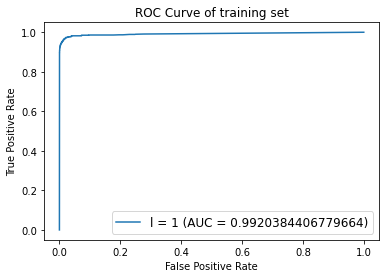

In [13]:
fpr, tpr, thresholds = roc_curve(train_y, prob_pre, pos_label = 'pos')
plt.plot(fpr,tpr, label = 'l = 1 (AUC = {})'.format(auc(fpr, tpr)))
plt.title('ROC Curve of training set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 12})
plt.show()

In [14]:
test_y_pred = model.predict(test_X)
prob_pre = model.predict_proba(test_X)[:, 1]

cm = confusion_matrix(test_y, test_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of test set:')
cm

The confusion matrix of test set:


,Predicted neg,Predicted pos
Actual neg,15610,15
Actual pos,122,253


In [15]:
print('The test classification arruracy: ', accuracy_score(test_y, test_y_pred))

The test classification arruracy:  0.9914375


In [16]:
print('The test misclassification rate: ', 1 - accuracy_score(test_y, test_y_pred))

The test misclassification rate:  0.008562500000000028


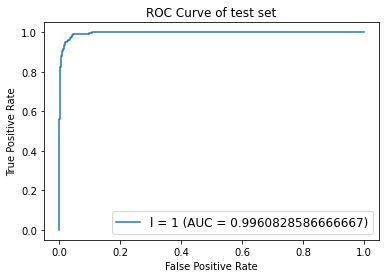

In [17]:
fpr, tpr, thresholds = roc_curve(test_y, prob_pre, pos_label = 'pos')
plt.plot(fpr,tpr, label = 'l = 1 (AUC = {})'.format(auc(fpr, tpr)))
plt.title('ROC Curve of test set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 12})
plt.show()

In [18]:
print('The Out of Bag error: ', 1 - model.oob_score_)

The out of Bag error:  0.0069666666666666766


In [19]:
print('The test error: ', 1 - accuracy_score(test_y, test_y_pred))

The test error:  0.008562500000000028


# (d)

In [49]:
###   https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/#:~:text=ROC%20AUC%3A%200.869-,Random%20Forest%20With%20Class%20Weighting,of%20a%20chosen%20split%20point.
###   I learned how class imbalance is addressed in random forests on this website

###   There are several methods to deal with class imbalance:
###   Random Forest With Class Weighting: RandomForestClassifier(class_weight = 'balanced')
###   Random Forest With Bootstrap Class Weighting: RandomForestClassifier(class_weight = 'balanced_subsample')
###   Random Forest With Random Undersampling: BalancedRandomForestClassifier()
###   Easy Ensemble for Imbalanced Classification: EasyEnsembleClassifier()

In [19]:
###   I tried Random Forest With Random Undersampling
###   To ues this method, I have to install 'imblearn' packge
###   For certain reasons, the '/imblearn/ensemble/_forest.py' downloaded form official documentation is 
###   wrong somewhere. I downloaded the latest file from Github and replaced it. Here is the link to the file:
###   https://github.com/scikit-learn-contrib/imbalanced-learn/blob/9f8830e/imblearn/ensemble/_forest.py#L76

###   I will upload both '_forest.py' files on the assignment link


model = BalancedRandomForestClassifier(oob_score = True, random_state = 15)
model.fit(train_X, train_y)

/opt/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:683: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


BalancedRandomForestClassifier(oob_score=True, random_state=15)

In [20]:
train_y_pred = model.predict(train_X)
prob_pre = model.predict_proba(train_X)[:, 1]

cm = confusion_matrix(train_y, train_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of training set:')
cm

The confusion matrix of training set:


,Predicted neg,Predicted pos
Actual neg,55802,3198
Actual pos,0,1000


In [21]:
print('The train classification arruracy: ', accuracy_score(train_y, train_y_pred))

The train classification arruracy:  0.9467


In [22]:
print('The train misclassification rate: ', 1 - accuracy_score(train_y, train_y_pred))

The train misclassification rate:  0.053300000000000014


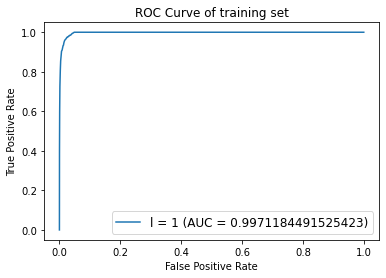

In [23]:
fpr, tpr, thresholds = roc_curve(train_y, prob_pre, pos_label = 'pos')
plt.plot(fpr,tpr, label = 'l = 1 (AUC = {})'.format(auc(fpr, tpr)))
plt.title('ROC Curve of training set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 12})
plt.show()

In [24]:
test_y_pred = model.predict(test_X)
prob_pre = model.predict_proba(test_X)[:, 1]

cm = confusion_matrix(test_y, test_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of test set:')
cm

The confusion matrix of test set:


,Predicted neg,Predicted pos
Actual neg,14807,818
Actual pos,6,369


In [25]:
print('The test classification arruracy: ', accuracy_score(test_y, test_y_pred))

The test classification arruracy:  0.9485


In [26]:
print('The test misclassification rate: ', 1 - accuracy_score(test_y, test_y_pred))

The test misclassification rate:  0.05149999999999999


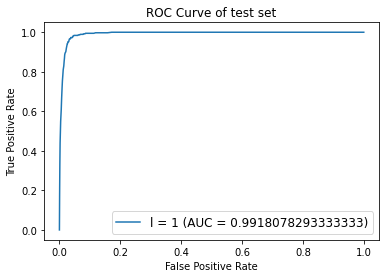

In [27]:
fpr, tpr, thresholds = roc_curve(test_y, prob_pre, pos_label = 'pos')
plt.plot(fpr,tpr, label = 'l = 1 (AUC = {})'.format(auc(fpr, tpr)))
plt.title('ROC Curve of test set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 12})
plt.show()

In [28]:
print('The Out of Bag error: ', 1 - model.oob_score_)

The out of Bag error:  0.03261666666666663


In [29]:
print('The test error: ', 1 - accuracy_score(test_y, test_y_pred))

The test error:  0.05149999999999999


From the result, the Out of Bag error increased from 0.0069666666666666766 to 0.03261666666666663. The test error rate increased from 0.008562500000000028 to 0.05149999999999999. Although the accuracy has dropped, the random undersampling of class 'neg' increases the model's ability to predict class 'pos'.

# (e)

# For 5 fold:

In [96]:
CV_model = KFold(n_splits = 5, shuffle = True, random_state = 15)

In [8]:
alphas = []
for i in range(-5, 4):
    alphas.append(math.pow(math.e, i))

In [22]:
y_daya = []
for i in range(len(data_y)):
    if data_y[i] == 'pos':
        y_daya.append(1)
    if data_y[i] == 'neg':
        y_daya.append(0)

y_train, y_test = y_daya[:60000], y_daya[60000:]

In [99]:
xgbr_scores = []

for i in alphas:
    xgbr = xgb.XGBClassifier(objective = 'binary:logistic', reg_alpha = i)
    score = cross_val_score(xgbr, train_X, y_train, scoring = 'accuracy', cv = CV_model).mean()
    xgbr_scores.append(score)
    

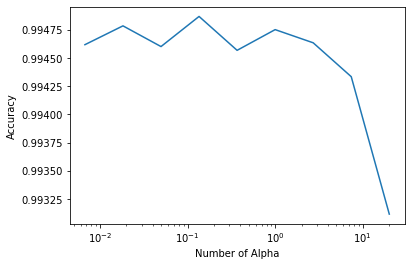

In [104]:
plt.plot(alphas, xgbr_scores)
plt.xlabel('Number of Alpha')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

In [105]:
best_alpha = alphas[np.argmax(xgbr_scores)]
print('α (the regularization term) using 5 fold cross-validation: ', best_alpha)

α (the regularization term) using 5 fold cross-validation:  0.1353352832366127


In [107]:
model = xgb.XGBClassifier(objective = 'binary:logistic', reg_alpha = best_alpha)
model.fit(train_X, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.1353352832366127, reg_lambda=1, ...)

In [108]:
train_y_pred = model.predict(train_X)
prob_pre = model.predict_proba(train_X)[:, 1]

cm = confusion_matrix(y_train, train_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of training set:')
cm

The confusion matrix of training set:


,Predicted neg,Predicted pos
Actual neg,59000,0
Actual pos,1,999


In [109]:
print('The train classification arruracy: ', accuracy_score(y_train, train_y_pred))

The train classification arruracy:  0.9999833333333333


In [110]:
print('The train misclassification rate: ', 1 - accuracy_score(y_train, train_y_pred))

The train misclassification rate:  1.666666666666483e-05


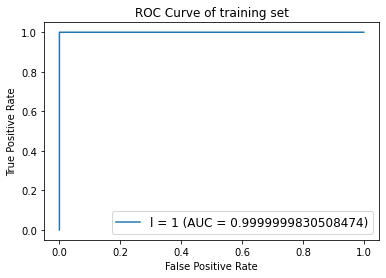

In [112]:
fpr, tpr, thresholds = roc_curve(y_train, prob_pre, pos_label = 1)
plt.plot(fpr,tpr, label = 'l = 1 (AUC = {})'.format(auc(fpr, tpr)))
plt.title('ROC Curve of training set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 12})
plt.show()

In [113]:
test_y_pred = model.predict(test_X)
prob_pre = model.predict_proba(test_X)[:, 1]

cm = confusion_matrix(y_test, test_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of test set:')
cm

The confusion matrix of test set:


,Predicted neg,Predicted pos
Actual neg,15608,17
Actual pos,88,287


In [114]:
print('The test classification arruracy: ', accuracy_score(y_test, test_y_pred))

The test classification arruracy:  0.9934375


In [115]:
print('The test misclassification rate: ', 1 - accuracy_score(y_test, test_y_pred))

The test misclassification rate:  0.006562500000000027


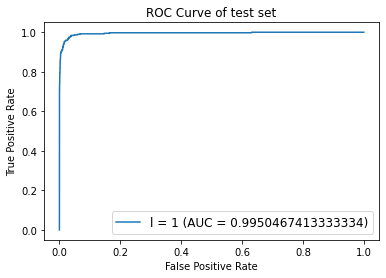

In [117]:
fpr, tpr, thresholds = roc_curve(y_test, prob_pre, pos_label = 1)
plt.plot(fpr,tpr, label = 'l = 1 (AUC = {})'.format(auc(fpr, tpr)))
plt.title('ROC Curve of test set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 12})
plt.show()

# For 10 fold:

In [118]:
CV_model = KFold(n_splits = 10, shuffle = True, random_state = 15)

In [119]:
xgbr_scores = []

for i in alphas:
    xgbr = xgb.XGBClassifier(objective = 'binary:logistic', reg_alpha = i)
    score = cross_val_score(xgbr, train_X, y_train, scoring = 'accuracy', cv = CV_model).mean()
    xgbr_scores.append(score)
    

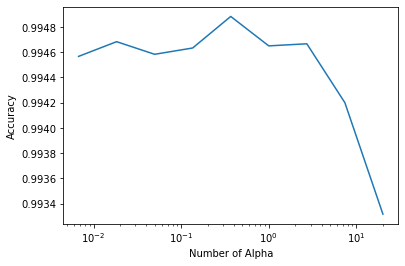

In [120]:
plt.plot(alphas, xgbr_scores)
plt.xlabel('Number of Alpha')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

In [121]:
best_alpha = alphas[np.argmax(xgbr_scores)]
print('α (the regularization term) using 10 fold cross-validation: ', best_alpha)

α (the regularization term) using 10 fold cross-validation:  0.36787944117144233


In [122]:
model = xgb.XGBClassifier(objective = 'binary:logistic', reg_alpha = best_alpha)
model.fit(train_X, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.36787944117144233, reg_lambda=1, ...)

In [123]:
train_y_pred = model.predict(train_X)
prob_pre = model.predict_proba(train_X)[:, 1]

cm = confusion_matrix(y_train, train_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of training set:')
cm

The confusion matrix of training set:


,Predicted neg,Predicted pos
Actual neg,59000,0
Actual pos,1,999


In [124]:
print('The train classification arruracy: ', accuracy_score(y_train, train_y_pred))

The train classification arruracy:  0.9999833333333333


In [125]:
print('The train misclassification rate: ', 1 - accuracy_score(y_train, train_y_pred))

The train misclassification rate:  1.666666666666483e-05


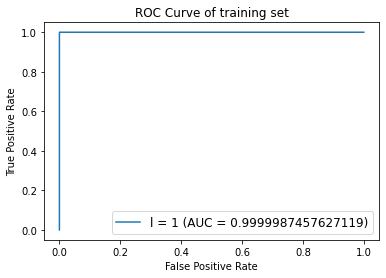

In [126]:
fpr, tpr, thresholds = roc_curve(y_train, prob_pre, pos_label = 1)
plt.plot(fpr,tpr, label = 'l = 1 (AUC = {})'.format(auc(fpr, tpr)))
plt.title('ROC Curve of training set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 12})
plt.show()

In [127]:
test_y_pred = model.predict(test_X)
prob_pre = model.predict_proba(test_X)[:, 1]

cm = confusion_matrix(y_test, test_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of test set:')
cm

The confusion matrix of test set:


,Predicted neg,Predicted pos
Actual neg,15612,13
Actual pos,76,299


In [128]:
print('The test classification arruracy: ', accuracy_score(y_test, test_y_pred))

The test classification arruracy:  0.9944375


In [129]:
print('The test misclassification rate: ', 1 - accuracy_score(y_test, test_y_pred))

The test misclassification rate:  0.005562500000000026


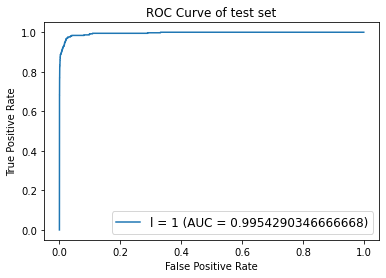

In [130]:
fpr, tpr, thresholds = roc_curve(y_test, prob_pre, pos_label = 1)
plt.plot(fpr,tpr, label = 'l = 1 (AUC = {})'.format(auc(fpr, tpr)))
plt.title('ROC Curve of test set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 12})
plt.show()

# For leave-one-out:

In [54]:
CV_model = LeaveOneOut()

In [56]:
xgbr = xgb.XGBClassifier(objective = 'binary:logistic')
model = RandomizedSearchCV(estimator = xgbr, param_distributions = {'reg_alpha': alphas}, scoring = 'accuracy', cv = CV_model)
model.fit(train_X, y_train)
model

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [11]:
xgbr_scores = []

for i in alphas:
    xgbr = xgb.XGBClassifier(objective = 'binary:logistic', reg_alpha = i)
    score = cross_val_score(xgbr, train_X, y_train, scoring = 'accuracy', cv = CV_model).mean()
    xgbr_scores.append(score)

KeyboardInterrupt: 

In [ ]:
plt.plot(alphas, xgbr_scores)
plt.xlabel('Number of Alpha')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

In [ ]:
best_alpha = alphas[np.argmax(xgbr_scores)]
print('α (the regularization term) using leave-one-out cross-validation: ', best_alpha)

In [ ]:
model = xgb.XGBClassifier(objective = 'binary:logistic', reg_alpha = best_alpha)
model.fit(train_X, y_train)

In [ ]:
train_y_pred = model.predict(train_X)
prob_pre = model.predict_proba(train_X)[:, 1]

cm = confusion_matrix(y_train, train_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of training set:')
cm

In [ ]:
print('The train classification arruracy: ', accuracy_score(y_train, train_y_pred))

In [ ]:
print('The train misclassification rate: ', 1 - accuracy_score(y_train, train_y_pred))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, prob_pre, pos_label = 1)
plt.plot(fpr,tpr, label = 'l = 1 (AUC = {})'.format(auc(fpr, tpr)))
plt.title('ROC Curve of training set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 12})
plt.show()

In [ ]:
test_y_pred = model.predict(test_X)
prob_pre = model.predict_proba(test_X)[:, 1]

cm = confusion_matrix(y_test, test_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of test set:')
cm

In [ ]:
print('The test classification arruracy: ', accuracy_score(y_test, test_y_pred))

In [ ]:
print('The test misclassification rate: ', 1 - accuracy_score(y_test, test_y_pred))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, prob_pre, pos_label = 1)
plt.plot(fpr,tpr, label = 'l = 1 (AUC = {})'.format(auc(fpr, tpr)))
plt.title('ROC Curve of test set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 12})
plt.show()

# (f)

In [12]:
over = SMOTE(sampling_strategy = 0.1)
under = RandomUnderSampler(sampling_strategy = 1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps = steps)
train_X_smote, y_train_smote = pipeline.fit_resample(train_X, y_train)
Counter(y_train_smote)

Counter({0: 5900, 1: 5900})

# For 5 fold:

In [13]:
CV_model = KFold(n_splits = 5, shuffle = True, random_state = 15)

In [14]:
xgbr_scores = []

for i in alphas:
    xgbr = xgb.XGBClassifier(objective = 'binary:logistic', reg_alpha = i)
    score = cross_val_score(xgbr, train_X_smote, y_train_smote, scoring = 'accuracy', cv = CV_model).mean()
    xgbr_scores.append(score)

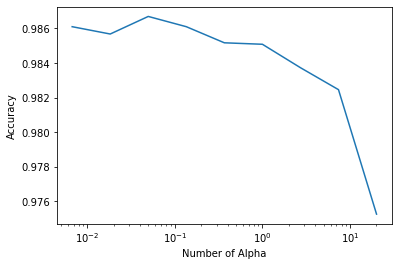

In [15]:
plt.plot(alphas, xgbr_scores)
plt.xlabel('Number of Alpha')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

In [27]:
best_alpha = alphas[np.argmax(xgbr_scores)]
print('α (the regularization term) using 5 fold cross-validation: ', best_alpha)

α (the regularization term) using 5 fold cross-validation:  0.04978706836786395


In [17]:
model = xgb.XGBClassifier(objective = 'binary:logistic', reg_alpha = best_alpha)
model.fit(train_X, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.04978706836786395, reg_lambda=1, ...)

In [18]:
train_y_pred = model.predict(train_X)
prob_pre = model.predict_proba(train_X)[:, 1]

cm = confusion_matrix(y_train, train_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of training set:')
cm

The confusion matrix of training set:


,Predicted neg,Predicted pos
Actual neg,59000,0
Actual pos,1,999


In [19]:
print('The train classification arruracy: ', accuracy_score(y_train, train_y_pred))

The train classification arruracy:  0.9999833333333333


In [20]:
print('The train misclassification rate: ', 1 - accuracy_score(y_train, train_y_pred))

The train misclassification rate:  1.666666666666483e-05


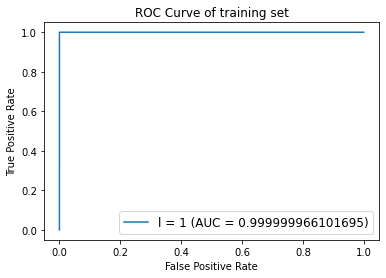

In [21]:
fpr, tpr, thresholds = roc_curve(y_train, prob_pre, pos_label = 1)
plt.plot(fpr,tpr, label = 'l = 1 (AUC = {})'.format(auc(fpr, tpr)))
plt.title('ROC Curve of training set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 12})
plt.show()

In [22]:
test_y_pred = model.predict(test_X)
prob_pre = model.predict_proba(test_X)[:, 1]

cm = confusion_matrix(y_test, test_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of test set:')
cm

The confusion matrix of test set:


,Predicted neg,Predicted pos
Actual neg,15611,14
Actual pos,85,290


In [23]:
print('The test classification arruracy: ', accuracy_score(y_test, test_y_pred))

The test classification arruracy:  0.9938125


In [24]:
print('The test misclassification rate: ', 1 - accuracy_score(y_test, test_y_pred))

The test misclassification rate:  0.0061875000000000124


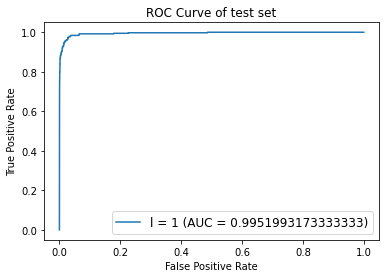

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, prob_pre, pos_label = 1)
plt.plot(fpr,tpr, label = 'l = 1 (AUC = {})'.format(auc(fpr, tpr)))
plt.title('ROC Curve of test set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 12})
plt.show()

# For 10 fold:

In [29]:
CV_model = KFold(n_splits = 10, shuffle = True, random_state = 15)

In [30]:
xgbr_scores = []

for i in alphas:
    xgbr = xgb.XGBClassifier(objective = 'binary:logistic', reg_alpha = i)
    score = cross_val_score(xgbr, train_X_smote, y_train_smote, scoring = 'accuracy', cv = CV_model).mean()
    xgbr_scores.append(score)

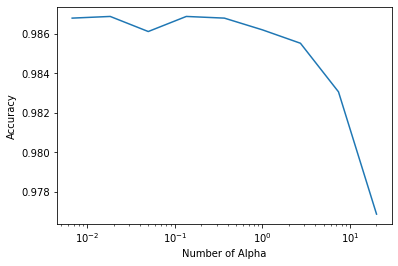

In [31]:
plt.plot(alphas, xgbr_scores)
plt.xlabel('Number of Alpha')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

In [32]:
best_alpha = alphas[np.argmax(xgbr_scores)]
print('α (the regularization term) using 10 fold cross-validation: ', best_alpha)

α (the regularization term) using 10 fold cross-validation:  0.018315638888734186


In [33]:
model = xgb.XGBClassifier(objective = 'binary:logistic', reg_alpha = best_alpha)
model.fit(train_X, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.018315638888734186, reg_lambda=1, ...)

In [34]:
train_y_pred = model.predict(train_X)
prob_pre = model.predict_proba(train_X)[:, 1]

cm = confusion_matrix(y_train, train_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of training set:')
cm

The confusion matrix of training set:


,Predicted neg,Predicted pos
Actual neg,59000,0
Actual pos,1,999


In [35]:
print('The train classification arruracy: ', accuracy_score(y_train, train_y_pred))

The train classification arruracy:  0.9999833333333333


In [36]:
print('The train misclassification rate: ', 1 - accuracy_score(y_train, train_y_pred))

The train misclassification rate:  1.666666666666483e-05


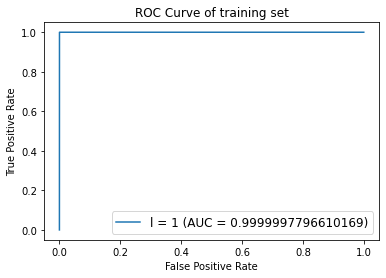

In [37]:
fpr, tpr, thresholds = roc_curve(y_train, prob_pre, pos_label = 1)
plt.plot(fpr,tpr, label = 'l = 1 (AUC = {})'.format(auc(fpr, tpr)))
plt.title('ROC Curve of training set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 12})
plt.show()

In [38]:
test_y_pred = model.predict(test_X)
prob_pre = model.predict_proba(test_X)[:, 1]

cm = confusion_matrix(y_test, test_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of test set:')
cm

The confusion matrix of test set:


,Predicted neg,Predicted pos
Actual neg,15608,17
Actual pos,87,288


In [39]:
print('The test classification arruracy: ', accuracy_score(y_test, test_y_pred))

The test classification arruracy:  0.9935


In [40]:
print('The test misclassification rate: ', 1 - accuracy_score(y_test, test_y_pred))

The test misclassification rate:  0.00649999999999995


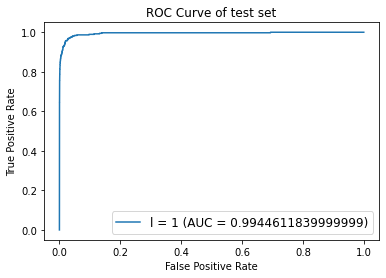

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, prob_pre, pos_label = 1)
plt.plot(fpr,tpr, label = 'l = 1 (AUC = {})'.format(auc(fpr, tpr)))
plt.title('ROC Curve of test set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 12})
plt.show()

# For leave-one-out:

In [23]:
CV_model = LeaveOneOut()

In [24]:
alphas = []
for i in range(-4, 1):
    alphas.append(math.pow(math.e, i))

In [25]:
xgbr = xgb.XGBClassifier(objective = 'binary:logistic')
model = GridSearchCV(estimator = xgbr, param_grid = {'reg_alpha': alphas}, scoring = 'accuracy', cv = CV_model, n_jobs = -1)
model.fit(train_X, y_train)
model

KeyboardInterrupt: 

In [ ]:
xgbr_scores = []

for i in alphas:
    xgbr = xgb.XGBClassifier(objective = 'binary:logistic', reg_alpha = i)
    score = cross_val_score(xgbr, train_X_smote, y_train_smote, scoring = 'accuracy', cv = CV_model).mean()
    xgbr_scores.append(score)

In [ ]:
plt.plot(alphas, xgbr_scores)
plt.xlabel('Number of Alpha')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

In [ ]:
best_alpha = alphas[np.argmax(xgbr_scores)]
print('α (the regularization term) using 10 fold cross-validation: ', best_alpha)

In [ ]:
model = xgb.XGBClassifier(objective = 'binary:logistic', reg_alpha = best_alpha)
model.fit(train_X, y_train)

In [ ]:
train_y_pred = model.predict(train_X)
prob_pre = model.predict_proba(train_X)[:, 1]

cm = confusion_matrix(y_train, train_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of training set:')
cm

In [ ]:
print('The train classification arruracy: ', accuracy_score(y_train, train_y_pred))

In [ ]:
print('The train misclassification rate: ', 1 - accuracy_score(y_train, train_y_pred))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, prob_pre, pos_label = 1)
plt.plot(fpr,tpr, label = 'l = 1 (AUC = {})'.format(auc(fpr, tpr)))
plt.title('ROC Curve of training set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 12})
plt.show()

In [ ]:
test_y_pred = model.predict(test_X)
prob_pre = model.predict_proba(test_X)[:, 1]

cm = confusion_matrix(y_test, test_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of test set:')
cmtest_y_pred = model.predict(test_X)
prob_pre = model.predict_proba(test_X)[:, 1]

cm = confusion_matrix(y_test, test_y_pred)
cm = pd.DataFrame(cm, columns = ['Predicted neg', 'Predicted pos'], index = ['Actual neg', 'Actual pos'])
print('The confusion matrix of test set:')
cm

In [ ]:
print('The test classification arruracy: ', accuracy_score(y_test, test_y_pred))

In [ ]:
print('The test misclassification rate: ', 1 - accuracy_score(y_test, test_y_pred))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, prob_pre, pos_label = 1)
plt.plot(fpr,tpr, label = 'l = 1 (AUC = {})'.format(auc(fpr, tpr)))
plt.title('ROC Curve of test set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop = {'size': 12})
plt.show()

# 2. ISLR 6.6.3

(a) With s increasing, the model will be more and more flexible. Since the restriction of β is reducing, which will lead to decreased RSS. So the answer is iv.

(b) At first, the test RSS will reduce because of the flexible model. Then overfitting will increase the RSS. So the answer is ii.

(c) Variance will steadily increase with the increasing by model flexibility. So the answer is iii.

(d) Bias will decrease with the increasing by the model flexibility. So thw answer is iv.

(e) Irreducible error has no relation with model parameters. So the answer is v.

# 3. ISLR 6.6.5

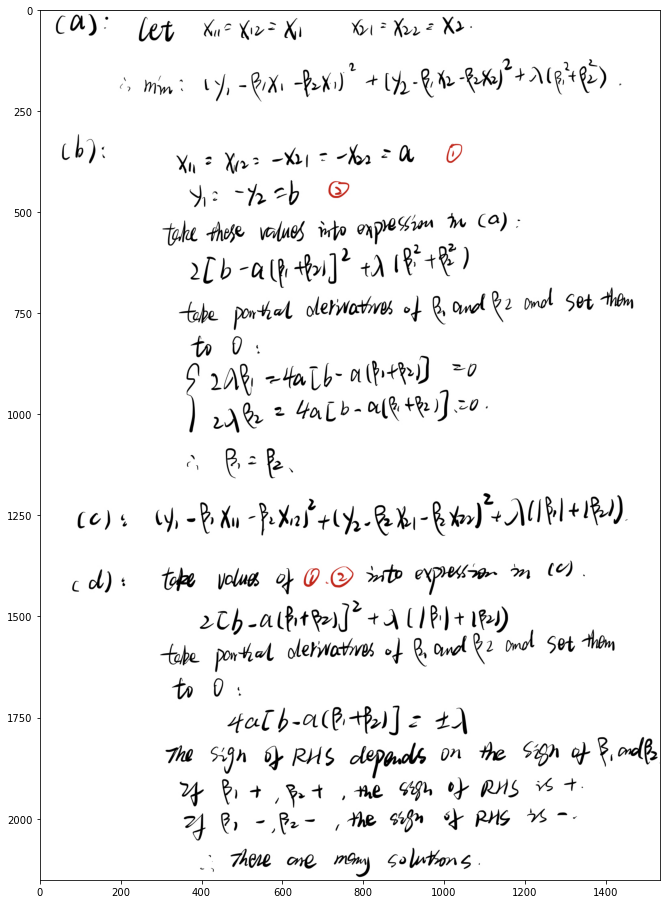

In [9]:
plt.figure(figsize = (18, 16))
lena = mpimg.imread('ISLR 6.6.5.jpeg')
plt.imshow(lena) 

# 4. ISLR 8.4.5

In [5]:
preb  = [0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75]

In [6]:
count_red, count_green = 0, 0
for i in preb:
    if i > 0.5:
        count_red = count_red + 1
    if i < 0.5:
        count_green = count_green + 1

if count_red > count_green:
    print('The result based on majority vote is: Red')
if count_red < count_green:
    print('The result based on majority vote is: Green')

The result based on majority vote is: Red


In [7]:
if np.mean(preb) > 0.5:
    print('For the average probability approach, the average probability is: ', np.mean(preb), ', the prediction is Red.')
if np.mean(preb) < 0.5:
    print('For the average probability approach, the average probability is: ', np.mean(preb), ', the prediction is Green')

For the average probability approach, the average probability is:  0.45 , the prediction is Green


# 5. ISLR 9.7.3

In [ ]:
X = pd.DataFrame(data = {'x1': [3, 2, 4, 1, 2, 4, 4], 'x2': [4, 2, 4, 4, 1, 3, 1]})
y = pd.DataFrame(data = {'y': ['red', 'red', 'red', 'red', 'blue', 'blue', 'blue']})
model = svm.SVC(C = 1000, kernel = 'linear')
model.fit(X, y)

In [ ]:
plt.figure()
plt.scatter(X, y, c = y)
